## Importing librarries

Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [31]:
movies = pd.read_csv("datasets/TMDB_movie_dataset_v11.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261781 entries, 0 to 1261780
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1261781 non-null  int64  
 1   title                 1261768 non-null  object 
 2   vote_average          1261781 non-null  float64
 3   vote_count            1261781 non-null  int64  
 4   status                1261781 non-null  object 
 5   release_date          1019565 non-null  object 
 6   revenue               1261781 non-null  int64  
 7   runtime               1261781 non-null  int64  
 8   adult                 1261781 non-null  bool   
 9   backdrop_path         325569 non-null   object 
 10  budget                1261781 non-null  int64  
 11  homepage              131719 non-null   object 
 12  imdb_id               632145 non-null   object 
 13  original_language     1261781 non-null  object 
 14  original_title        1261768 non-

In [32]:
movies[['id','title','release_date','imdb_id','overview','genres','keywords', 'status']].head()

,id,title,release_date,imdb_id,overview,genres,keywords,status
0,27205,Inception,2010-07-15,tt1375666,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Released
1,157336,Interstellar,2014-11-05,tt0816692,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Released
2,155,The Dark Knight,2008-07-16,tt0468569,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Released
3,19995,Avatar,2009-12-15,tt0499549,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Released
4,24428,The Avengers,2012-04-25,tt0848228,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Released


In [33]:
movies[['id','title','release_date','imdb_id','overview','genres','keywords','status']].isnull().sum()

id                   0
title               13
release_date    242216
imdb_id         629636
overview        273504
genres          530429
keywords        934865
status               0
dtype: int64

## Data Cleaning

In [34]:
movies = movies[['id','title','release_date','imdb_id','overview','genres','keywords','status']].dropna()
print(movies[['id','title','release_date','imdb_id','overview','genres','status']].isna().sum())
print(print(movies.duplicated().sum()))

id              0
title           0
release_date    0
imdb_id         0
overview        0
genres          0
status          0
dtype: int64
7
None


In [35]:
movies[['id','title','release_date','imdb_id','overview','genres','keywords','status']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 176327 entries, 0 to 1261773
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            176327 non-null  int64 
 1   title         176327 non-null  object
 2   release_date  176327 non-null  object
 3   imdb_id       176327 non-null  object
 4   overview      176327 non-null  object
 5   genres        176327 non-null  object
 6   keywords      176327 non-null  object
 7   status        176327 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.1+ MB


In [36]:
df = movies[['id','title','release_date','imdb_id','overview','genres','keywords','status']]
df.head()


,id,title,release_date,imdb_id,overview,genres,keywords,status
0,27205,Inception,2010-07-15,tt1375666,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Released
1,157336,Interstellar,2014-11-05,tt0816692,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Released
2,155,The Dark Knight,2008-07-16,tt0468569,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Released
3,19995,Avatar,2009-12-15,tt0499549,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Released
4,24428,The Avengers,2012-04-25,tt0848228,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Released


## Some Validation

In [37]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

In [30]:
# Get 5 earliest movies (lowest years)
earliest_5 = df.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                     title  release_year release_date
19222     Passage of Venus          1874   1874-12-09
47691  The Musician Monkey          1878   1878-05-07
55274    The Magic Rosette          1878   1878-05-07
88290      Zim, Boum, Boum          1878   1878-05-07
88291      Le Jeu de Corde          1878   1878-05-07

5 Most Recent Movies:
                                 title  release_year release_date
360301                            Guys          2027   2027-11-24
478442   Приключения старика Хоттабыча          2027   2027-01-01
485707         Captain Zero: The Movie          2027   2027-06-18
1092130          Avengers: Secret Wars          2027   2027-05-06
419909                   Cheburashka 2          2026   2026-01-01


In [49]:
# Check what status values exist
print("Available status values:")
print(df['status'].value_counts())

# Then filter
df_released = df[df['status'] == 'Released'].reset_index(drop=True)

Available status values:
status
Released           175354
Post Production       469
In Production         437
Planned                67
Name: count, dtype: int64


In [50]:
# Get 5 earliest movies (lowest years)
earliest_5 = df_released.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df_released.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                     title  release_year release_date
17254     Passage of Venus          1874   1874-12-09
37367  The Musician Monkey          1878   1878-05-07
42101    The Magic Rosette          1878   1878-05-07
60387      Zim, Boum, Boum          1878   1878-05-07
60388      Le Jeu de Corde          1878   1878-05-07

5 Most Recent Movies:
                     title  release_year release_date
136666               Angel          2026   2026-01-01
87771              Drained          2025   2025-01-07
99808     Govan Fair Queen          2025   2025-07-14
102216  Within These Halls          2025   2025-05-26
103658         Sleepwalker          2025   2025-04-25


In [51]:
df_released[df_released['release_year'] > 2025]

,id,title,release_date,imdb_id,overview,genres,keywords,status,release_year
136666,1419306,Angel,2026-01-01,tt10091064,The two adult kids of an alcoholic retired Nav...,Comedy,"dark comedy, grief, family",Released,2026


In [52]:
df_released.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175354 entries, 0 to 175353
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            175354 non-null  int64         
 1   title         175354 non-null  object        
 2   release_date  175354 non-null  datetime64[ns]
 3   imdb_id       175354 non-null  object        
 4   overview      175354 non-null  object        
 5   genres        175354 non-null  object        
 6   keywords      175354 non-null  object        
 7   status        175354 non-null  object        
 8   release_year  175354 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 11.4+ MB


Decade distribution:


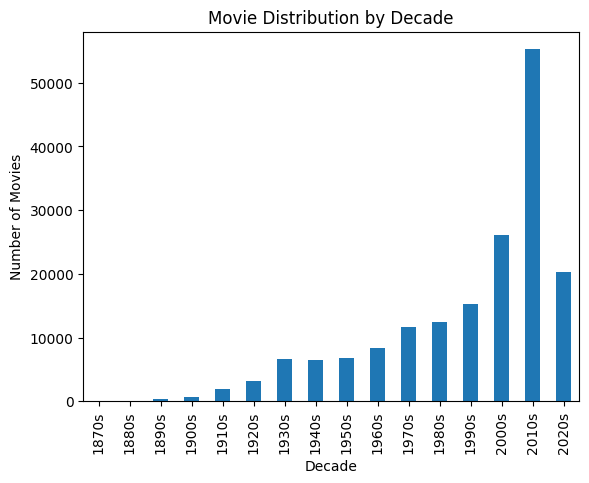

In [59]:
# Create decade column
df_released['decade'] = (df_released['release_year'] // 10) * 10
df_released['decade_label'] = df_released['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

### Column Extraction


In [95]:
# Create df2
df2 = df_released[['id','imdb_id', 'title', 'overview', 'genres', 'keywords', 'decade_label']].copy()

In [96]:
df2.head()

,id,imdb_id,title,overview,genres,keywords,decade_label
0,27205,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2010s
1,157336,tt0816692,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2010s
2,155,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2000s
3,19995,tt0499549,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",2000s
4,24428,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",2010s


## Preprocessing Steps

### Stemming "Overview" Column

In [97]:
from nltk.stem.porter import PorterStemmer
import re

# Initialize stemmer
ps = PorterStemmer()

def clean_and_stem_overview(text):
    """
    Clean and stem the overview text
    """
    # Remove years (optional - you can keep if you want temporal context)
    text = re.sub(r'\b(19[0-9]{2}|20[0-9]{2})\b', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (optional)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Split into words and stem each word
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join back into a single string
    return ' '.join(stemmed_words)

In [98]:
# Apply to overview column
df2['overview_stemmed'] = df2['overview'].apply(clean_and_stem_overview)

# Drop overview column
df2.drop(columns=['overview'], inplace=True)

# Preview the new column
df2['overview_stemmed'].head()

0    cobb a skill thief who commit corpor espionag ...
1    the adventur of a group of explor who make use...
2    batman rais the stake in hi war on crime with ...
3    in the 22nd centuri a parapleg marin is dispat...
4    when an unexpect enemi emerg and threaten glob...
Name: overview_stemmed, dtype: object

### Preprocessig for other text columns

In [99]:
def clean_text(text):
    """
    Convert text to lowercase and strip whitespace
    """
    if pd.isna(text):
        return ""
    
    return str(text).lower().strip()

In [100]:
# Define text columns to clean
text_columns = ['genres', 'keywords']

# Apply cleaning function to all text columns
for col in text_columns:
    df2[col] = df2[col].apply(clean_text)

# Preview cleaned data
print(df2[text_columns].head())

                                        genres  \
0           action, science fiction, adventure   
1            adventure, drama, science fiction   
2               drama, action, crime, thriller   
3  action, adventure, fantasy, science fiction   
4           science fiction, action, adventure   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york city, superhero, shield, based on com...  


### Creating the Soup

In [101]:
df2['soup'] = df2['genres'] + ' ' + df2['keywords'] + ' ' + df2['overview_stemmed'] + ' ' + df2['decade_label']
df2['soup'].head()

0    action, science fiction, adventure rescue, mis...
1    adventure, drama, science fiction rescue, futu...
2    drama, action, crime, thriller joker, sadism, ...
3    action, adventure, fantasy, science fiction fu...
4    science fiction, action, adventure new york ci...
Name: soup, dtype: object

In [102]:
df2['soup'].iloc[0]

'action, science fiction, adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious cobb a skill thief who commit corpor espionag by infiltr the subconsci of hi target is offer a chanc to regain hi old life as payment for a task consid to be imposs incept the implant of anoth person idea into a target subconsci 2010s'

## Modelling

### Vectorization Steps

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    min_df=10,      
    max_df=0.8,       # drop terms in ≥75% of the movies
    max_features=15000,             # Keep top 15,000 features
    ngram_range=(1, 2),            # Use unigrams and bigrams
)

X_tfidf = tfidf.fit_transform(df2['soup'].fillna(''))

In [104]:
X_tfidf.shape

(175354, 15000)

In [105]:
print(tfidf.get_feature_names_out()[:300])  # See what words are being used

['10' '10 year' '100' '100 year' '1000' '10000' '100000' '10th'
 '10yearold' '11' '11 year' '11th' '11yearold' '12' '12 year' '12th'
 '12yearold' '13' '13 year' '13th' '13yearold' '14' '14 year' '1453'
 '14th' '14yearold' '15' '15 year' '150' '15th' '15th century' '15yearold'
 '16' '16 year' '16mm' '16th' '16th centuri' '16th century' '16yearold'
 '17' '17 year' '17th' '17th centuri' '17th century' '17yearold' '18'
 '18 year' '1800' '1870' '1880' '1890' '1890s' '18th' '18th centuri'
 '18th century' '18yearold' '19' '19 year' '1900s' '1910s' '1917' '1920'
 '1920s' '1930' '1930s' '1936' '1936 39' '1940' '1940s' '1950' '1950s'
 '1954' '1954 62' '1960' '1960s' '1970' '1970s' '1980' '1980s' '1990'
 '1990s' '19th' '19th centuri' '19th century' '19thcenturi' '19yearold'
 '1st' '20' '20 year' '200' '2000' '20000' '2000s' '2010s' '2020s' '20th'
 '20th centuri' '20yearold' '21' '21st' '21st centuri' '22' '23' '23 year'
 '24' '24 hour' '25' '25 year' '25th' '26' '27' '28' '29' '2nd' '30'
 '30 yea

In [106]:
#Construct a reverse map of indices and movie titles
df2 = df2.reset_index(drop=True)
df2['title_lower'] = df2['title'].str.lower().str.strip()
indices = pd.Series(df2['id'].values, index=df2['title_lower']).drop_duplicates()

In [107]:
indices.head()


title_lower
inception           27205
interstellar       157336
the dark knight       155
avatar              19995
the avengers        24428
dtype: int64

### Model Function Creation

In [108]:
from sklearn.neighbors import NearestNeighbors
import difflib

# 1. Fit the NearestNeighbors model (do this once)
#    We ask for 11 neighbours: movie itself + 10 closest others
nn = NearestNeighbors(
    n_neighbors=11,
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
nn.fit(X_tfidf)   # X_tfidf is your TF–IDF sparse matrix

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [132]:
def get_recommendations(movie_title, nn_model=nn, tfidf_matrix=X_tfidf, df=df2, indices=indices, min_similarity=0.6):
    """
    Get 10 movie recommendations based on a movie title.
    
    Parameters:
    - movie_title: String, the title of the movie to find recommendations for
    - nn_model: Fitted NearestNeighbors model
    - tfidf_matrix: TF-IDF matrix used for training
    - df: DataFrame containing movie data
    - indices: Series mapping movie titles to IDs
    - min_similarity: Minimum similarity threshold for auto-correction
    
    Returns:
    - List of 10 recommended movie titles
    """
    # Normalize the input title
    key = movie_title.lower().strip()
    
    # Check if the title exists in our index
    if key not in indices.index:
        # Try to auto-correct using difflib
        close_matches = difflib.get_close_matches(key, indices.index, n=1, cutoff=min_similarity)
        
        if close_matches:
            corrected_key = close_matches[0]
            corrected_movie_id = indices[[corrected_key]].iloc[0]
            
            # Get the corrected movie title
            corrected_title = df[df['id'] == corrected_movie_id]['title'].iloc[0]
            print(f"Title '{movie_title}' not found. Using closest match: '{corrected_title}'")
            
            key = corrected_key
        else:
            raise KeyError(f"Movie title '{movie_title}' not found and no close match available.")
    
    # Get the movie ID for the title
    movie_id = indices[[key]].iloc[0]
    
    # Find the row index in the DataFrame
    movie_row = df[df['id'] == movie_id]
    if len(movie_row) == 0:
        raise KeyError(f"Movie with ID {movie_id} not found in DataFrame.")
    
    row_idx = movie_row.index[0]
    
    # Get the TF-IDF vector for this movie
    movie_vector = tfidf_matrix[row_idx]
    
    # Find the 11 nearest neighbors (including the movie itself)
    distances, neighbor_indices = nn_model.kneighbors(movie_vector, return_distance=True)
    
    # Remove the first neighbor (it's the movie itself) and get the next 10
    recommended_indices = neighbor_indices[0][1:11]  # Get indices 1-10
    
    # Get the recommended movie titles
    recommended_movies = df.iloc[recommended_indices]['title'].tolist()
    
    return recommended_movies

In [135]:
# Example usage
get_recommendations("Se7en")

['Cornered',
 'Ultima Pallottola',
 'Mukham',
 'Copycat',
 'Chasing Ghosts',
 'Almost Blue',
 'Chronicle of a Serial Killer',
 'The Sinners',
 'Papertrail',
 'Resurrection']